# Problem statement

1. Extract reviews of any product from ecommerce website like amazon
2. Perform emotion mining

In [141]:
from bs4 import BeautifulSoup
import urllib.request
import requests
import ssl
import pandas as pd
import spacy # language models
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [142]:
#productUrl = "https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/product-reviews/1617294438"
productUrl = "https://www.amazon.com/Deep-Learning-Adaptive-Computation-Machine/product-reviews/0262035618/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageSize=100"

headers = {
    'authority': 'www.amazon.com',
    'pragma': 'no-cache',
    'cache-control': 'no-cache',
    'rtt': '50',
    'downlink': '6.65',
    'ect': '4g',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-user': '?1',
    'sec-fetch-dest': 'document',
    'referer': 'https://www.amazon.com/Heat-Storm-HS-1500-PHX-WIFI-Infrared-Heater/dp/B07JXRWJ8D/ref=cm_cr_arp_d_pl_foot_top?ie=UTF8&th=1',
    'accept-language': 'en-US,en;q=0.9,la;q=0.8',
    'cookie': 'ubid-main=133-9061931-0297943; sid="u39jVVzRWP15jSjEJsTdwA==|9ucGRH1SUgtb9e1e982gkm5/DayNcyYRTYXgNPZNa+g="; x-main="mE3y@VSbrs7MHrVVNnP1GN@GVZOaUJqe"; at-main=Atza|IwEBIEv12ButU1VeMnrsclL17GM9BJ-80JPgG6TYbBZbAXZckOoe9wa7IyBNlbjEK-8F1AIpcMN4VR2tIGeWA0vdJ4PpvJA1R0N5Qn0zMsC4B6Y4megebgi3Jvq2BJ1g0jZRL9j9iYhPHFSdTUesgv9Q7p_PRb4dNNjnfnUGDeVxZHaCdWr-Iqatk6j8KcKYkusa9mKmGsz-2x_KF6xgU6Nx7QFE2yxAbegk8SnGIFiys8r99A; sess-at-main="NNbbNBJIIdO6ZUsf30V6vNV2aj2QETHGwAkzG3gX4ZE="; sst-main=Sst1|PQE1PjQcFvrt9Y3KNw8yA3eLEIpcrmUeovHZU8z9TftQ5cSjvbwa41EIkU6fNZnswQN4ItbnsOHE1dW6jzxtQ5W5bIW0nVNoX1SqhosV1IFUTgrfEJwe91NBnbMk4QMpfHZzjnBCtuP1l57JiSOetaBnrD4WZxe2IlQpTxhK57-mFsDAyjjPTpdWIsZFwK9KLFywkHaoJvVh6onccpXzMt_dEhnmwr3OeBWfFPagGojOYGpcnso44cDXzkLBMph3j_EnVk0ms-t-HRbuo64GAJ0O-Gc0e6o3D4JVCIy3pd9tERCyOn9iggvsICLQ5NDuq3IPop8KSk3xevMVZoEEucCO11ml7yWYg_Yo9wAlBGqRX9C4697s9qyM_llnAG0nn1KGTS-2BGyGl_7W47MtvpGTCtRdTp9jIJMFiwFPjUQ6h9to0Hligj45NYrF0p1JtCsH; i18n-prefs=USD; lc-main=en_US; aws-ubid-main=176-3363682-5411304; aws-session-id=140-0883594-3508442; aws-session-id-time=2232452694l; aws-session-token="4AcXH13Lb7gLaLAbVWxzhrnUWw5VZWqZi720/Dto7jgpDRcELFSp5rdL/70JOV/CzC3Q7NX5fwXr1hOyO1SGinrTZ2/mJwX9JI22zhbAj64paG31aDmWkELeUqOO9jxn87nBCHKuubVjDeLMfQoBykloAFSaSt6E/K+EiIG2dMyk5aC6G1Icjvrl1bdKmSGt3a+v4I/vPmozdi8jzhcihQnIA5aY3o5i/8p+kzEfCSQ="; sess-aws-at-main="OAo44oXc4/XY6EgTI5DzZjccXmr3Pf10LEqvTiATPBk="; regStatus=registered; aws_lang=en; s_fid=54929DF7E2EC5594-1DEC0D72EFDC6854; s_vn=1633268724773%26vn%3D1; s_invisit=true; s_cc=true; aws-target-visitor-id=1601732725193-893467; aws-target-data=%7B%22support%22%3A%221%22%7D; aws-userInfo=%7B%22arn%22%3A%22arn%3Aaws%3Aiam%3A%3A231071709544%3Aroot%22%2C%22alias%22%3A%22%22%2C%22username%22%3A%22jeff%2520james%22%2C%22keybase%22%3A%22%22%2C%22issuer%22%3A%22https%3A%2F%2Fwww.amazon.com%2Fap%2Fsignin%22%2C%22signinType%22%3A%22PUBLIC%22%7D; skin=noskin; csd-key=eyJ2IjoxLCJraWQiOiIzZTQwMDciLCJrZXkiOiJFTGpoTmpBeGhmNjgvTGdKQVNuTDBUcWx0a2JYaHRQdkVLRTRienk0bmVUM2Jnd0pHTHVlUlBjYkxya0RQVVRWMlV1YWI5WWZBMkZXTG93c1BxUUNtM21BL2RCbitJVkVuSmhFZkRqY2JUWEQrTllWbGlQSkhDeU9QYkpKa0RkYmNQRWtvOXNZa0VzU3hOZXFEbkZkUkk4b3FzY0dNZUU3MWFEVHcrRlNFVCtZYmd3amc3V0YyNjBoK29qQ0p6cVhkRDJzUVJBeVFtNmJxZG1TdXkzS092YkRIM293amNseTZVa0tKeGYzLzE5enA4OG10VWM2UG53clVvelQxMzdSbVpkVnlsZisvbjdSTGI0WkUzbjMzWDlEL1lsbmxhK0duLytlaU9qTjMzQUd3NG1NRC9oOTc0dFlqdmFQWnJDT2xKTk1RNmFVY3FpTDhReWQ0TUxwVFE9PSJ9; session-id-apay=143-6467005-0669008; session-id-time=2082787201l; session-id=146-2689202-9572416; s_dslv_s=More%20than%2030%20days; s_depth=2; s_dslv=1606267728256; s_nr=1606267728265-Repeat; session-token="gg4ozkVpSmo/CMUdJGU4vWV1Ap01LEGeSpGlQkj7ZEa3VEBeb+7xCHNDf8DV2y2tr45chYDEFySwu8cJx7Y1FN6QdAhBjINCqmSudE2ms/C0+61bcVE1sGzdOXLfxh57MgpZuzU1Xi/z3o8TsWfewFly/Kl6Aq0tKSWEPXT08CejwjX16Neh+Q00ofyScckwc/Qv/Q0oYIUysh3th6kRYg=="; csm-hit=tb:RP2649Z9F69V9KV5A8BV+sa-738Q8AECSK2TQNV33QMY-2WTAQEBB75E5T1SDK1R6|1606489267955&adb:adblk_yes&t:1606489267955',
}
resp = requests.get(productUrl, headers=headers)
resp.text

'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.sh

In [143]:
soup = BeautifulSoup(resp.text, "html.parser")

In [144]:
reviews = soup.find_all("div", {"class": "a-section review aok-relative"})

In [145]:
reviews

[<div class="a-section review aok-relative" data-hook="review" id="R1XNPL1BX5IVOM"><div class="a-row a-spacing-none" id="R1XNPL1BX5IVOM-review-card"><div class="a-section celwidget" id="customer_review-R1XNPL1BX5IVOM"><div class="a-row a-spacing-mini" data-hook="genome-widget"><a class="a-profile" data-a-size="small" href="/gp/profile/amzn1.account.AHB2B22DGXNTZYKE3SSDN6IOSRAQ/ref=cm_cr_arp_d_gw_btm?ie=UTF8"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-na.ssl-images-amazon.com/images/S/amazon-avatars/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-na.ssl-images-amazon.com/images/S/amazon-avatars/default._CR0,0,1024,1024_SX48_.png"/></noscript></div></div><div class="a-profile-content"><span class="a-profile-name">slag</span></div></a></div><div class="a-row"><a class="a-link-normal"

In [146]:
def get_review_stars(soup_obj: BeautifulSoup) -> str:
    try:
        review_str = soup_obj.find('a', {"class": "a-link-normal"}).get_text()
        review_str = review_str.lower()
        review_str = review_str.replace(" out of 5 stars", "")
        return review_str
    except Exception as e:
        return 'no_stars'
        print(e)

In [147]:
def get_review_body(soup_obj: BeautifulSoup) -> str:
    try:
        review_body = soup_obj.find('span', 
            {"class": "a-size-base review-text review-text-content"}
        ).get_text().strip()
        return review_body
    except Exception as e:
        return 'no_body'
        print(e)

In [148]:
def get_review_date(soup_obj: BeautifulSoup) -> str:
    try:
        review_date = soup_obj.find('span', 
            {"class": "a-size-base a-color-secondary review-date"}
        ).get_text().strip()
        return review_date
    except Exception as e:
        return 'no_date'
        print(e)

In [149]:
def get_review_components(soup_obj: BeautifulSoup) -> dict:
    return {
        'stars': get_review_stars(soup_obj) , 
        'body': get_review_body(soup_obj), 
        'date': get_review_date(soup_obj)
    }

In [152]:
records = [get_review_components(rev) for rev in reviews]
df = pd.DataFrame.from_records(records)

In [153]:
df

,stars,body,date
0,2.0,I am surprised by how poorly written this book...,"Reviewed in the United States on September 26,..."
1,2.0,Have I been reading amazon book reviews backwa...,"Reviewed in the United States on November 9, 2017"
2,1.0,"This book, in every sense of the word, is rush...","Reviewed in the United States on May 15, 2018"
3,2.0,The book was frankly a disappointment. It was ...,"Reviewed in the United States on July 7, 2017"
4,1.0,I would give this book -5 stars if I could. On...,"Reviewed in the United States on June 8, 2020"
5,1.0,"I suspect it is pirated, I can’t imagine how i...","Reviewed in the United States on June 23, 2018"
6,1.0,I was very excited when I got this book. Howev...,"Reviewed in the United States on January 3, 2019"
7,3.0,I find this book pretty frustrating because it...,"Reviewed in the United States on August 20, 2018"
8,5.0,This is not a coding book. I see a lot of nega...,"Reviewed in the United States on January 21, 2020"
9,5.0,"Very clear exposition, does the math without g...","Reviewed in the United States on February 1, 2018"


In [154]:
df['stars'].value_counts()

1.0    6
5.0    6
2.0    5
3.0    2
4.0    1
Name: stars, dtype: int64

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stars', ylabel='Density'>

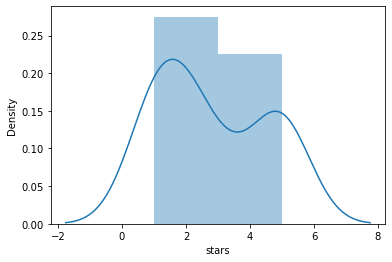

In [155]:
import seaborn as sn
sn.distplot(df['stars'])

<h2>Subjectivity and polarity</h2>

In [156]:
import re

In [160]:
# create custom function to Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [161]:
df["body"] = df["body"].apply(cleantext)

In [162]:
df

,stars,body,date
0,2.0,I am surprised by how poorly written this book...,"Reviewed in the United States on September 26,..."
1,2.0,Have I been reading amazon book reviews backwa...,"Reviewed in the United States on November 9, 2017"
2,1.0,"This book, in every sense of the word, is rush...","Reviewed in the United States on May 15, 2018"
3,2.0,The book was frankly a disappointment. It was ...,"Reviewed in the United States on July 7, 2017"
4,1.0,I would give this book -5 stars if I could. On...,"Reviewed in the United States on June 8, 2020"
5,1.0,"I suspect it is pirated, I can’t imagine how i...","Reviewed in the United States on June 23, 2018"
6,1.0,I was very excited when I got this book. Howev...,"Reviewed in the United States on January 3, 2019"
7,3.0,I find this book pretty frustrating because it...,"Reviewed in the United States on August 20, 2018"
8,5.0,This is not a coding book. I see a lot of nega...,"Reviewed in the United States on January 21, 2020"
9,5.0,"Very clear exposition, does the math without g...","Reviewed in the United States on February 1, 2018"


In [165]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["body"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])


In [166]:
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df

,stars,body,date,subjectivity,polarity
0,2.0,I am surprised by how poorly written this book...,"Reviewed in the United States on September 26,...",0.492201,0.098612
1,2.0,Have I been reading amazon book reviews backwa...,"Reviewed in the United States on November 9, 2017",0.420000,0.110000
2,1.0,"This book, in every sense of the word, is rush...","Reviewed in the United States on May 15, 2018",0.445400,0.076001
3,2.0,The book was frankly a disappointment. It was ...,"Reviewed in the United States on July 7, 2017",0.429167,-0.110833
4,1.0,I would give this book -5 stars if I could. On...,"Reviewed in the United States on June 8, 2020",0.455128,-0.232051
5,1.0,"I suspect it is pirated, I can’t imagine how i...","Reviewed in the United States on June 23, 2018",0.616667,0.158333
6,1.0,I was very excited when I got this book. Howev...,"Reviewed in the United States on January 3, 2019",0.552593,0.093056
7,3.0,I find this book pretty frustrating because it...,"Reviewed in the United States on August 20, 2018",0.467639,0.071944
8,5.0,This is not a coding book. I see a lot of nega...,"Reviewed in the United States on January 21, 2020",0.469792,0.238750
9,5.0,"Very clear exposition, does the math without g...","Reviewed in the United States on February 1, 2018",0.520417,0.407500


<b>We have used textblob here to get the positive/negative score for text</b>

In [168]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

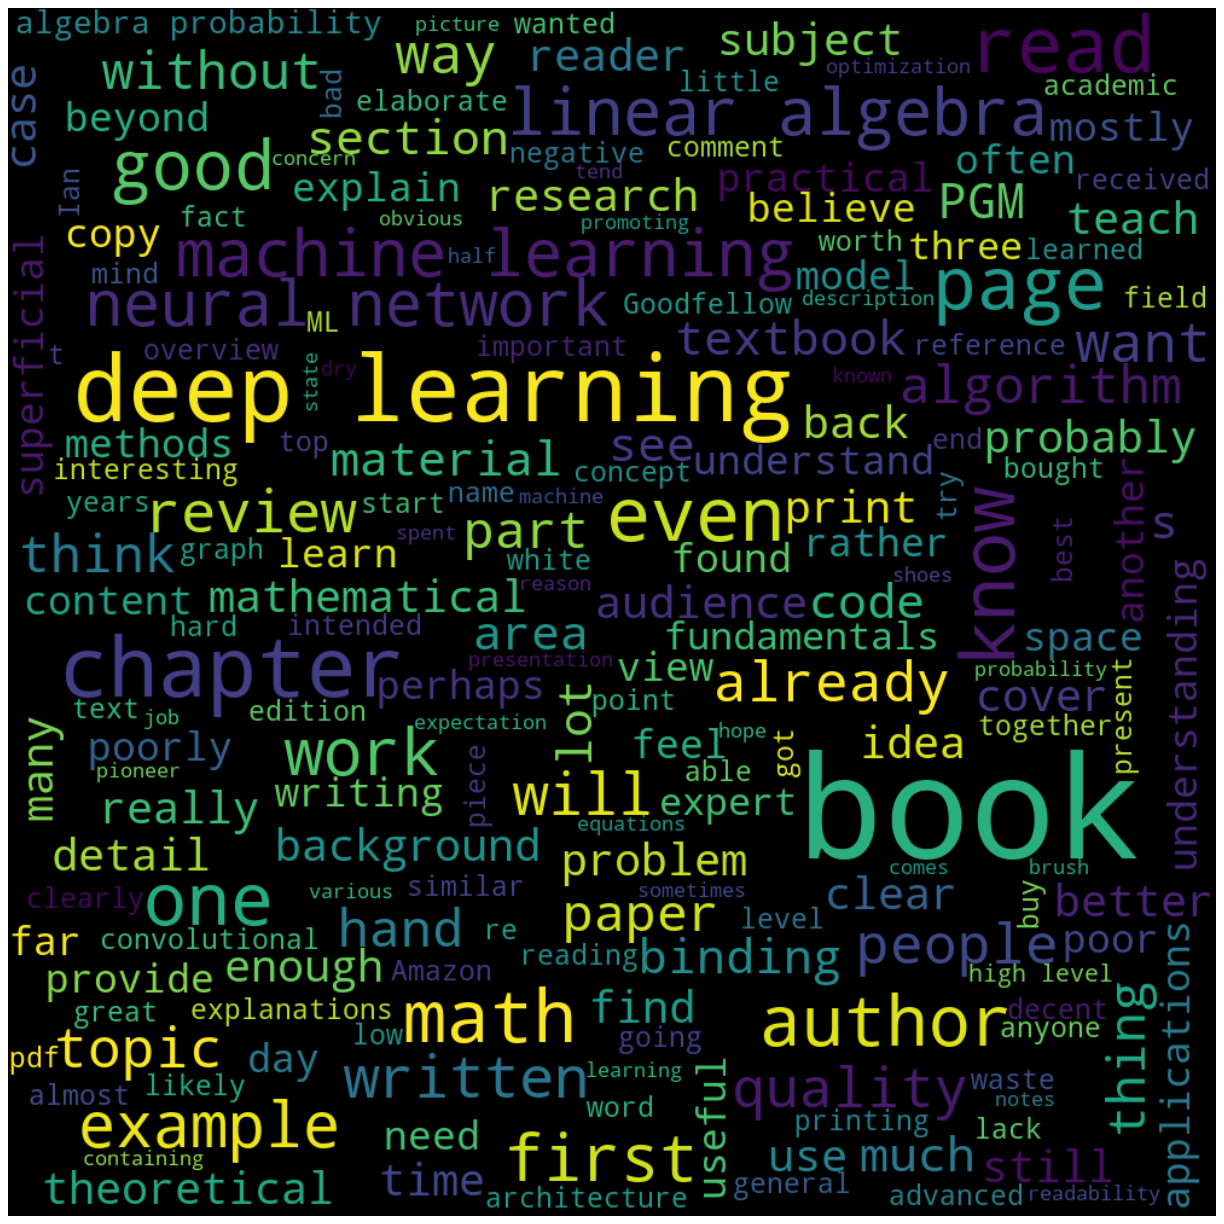

In [169]:
allwords = " ".join([twts for twts in df["body"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## Emotion mining on review body

In [170]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [171]:
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)
# Print The Data
df

,stars,body,date,subjectivity,polarity,analysis
0,2.0,I am surprised by how poorly written this book...,"Reviewed in the United States on September 26,...",0.492201,0.098612,Positive
1,2.0,Have I been reading amazon book reviews backwa...,"Reviewed in the United States on November 9, 2017",0.420000,0.110000,Positive
2,1.0,"This book, in every sense of the word, is rush...","Reviewed in the United States on May 15, 2018",0.445400,0.076001,Positive
3,2.0,The book was frankly a disappointment. It was ...,"Reviewed in the United States on July 7, 2017",0.429167,-0.110833,Negative
4,1.0,I would give this book -5 stars if I could. On...,"Reviewed in the United States on June 8, 2020",0.455128,-0.232051,Negative
5,1.0,"I suspect it is pirated, I can’t imagine how i...","Reviewed in the United States on June 23, 2018",0.616667,0.158333,Positive
6,1.0,I was very excited when I got this book. Howev...,"Reviewed in the United States on January 3, 2019",0.552593,0.093056,Positive
7,3.0,I find this book pretty frustrating because it...,"Reviewed in the United States on August 20, 2018",0.467639,0.071944,Positive
8,5.0,This is not a coding book. I see a lot of nega...,"Reviewed in the United States on January 21, 2020",0.469792,0.238750,Positive
9,5.0,"Very clear exposition, does the math without g...","Reviewed in the United States on February 1, 2018",0.520417,0.407500,Positive


In [172]:
df["analysis"].value_counts()

Positive    18
Negative     2
Name: analysis, dtype: int64

<b>We can see that there are more positive reviews than the negative</b>